In [3]:
# Importing packages (you may need more libraries )
import numpy as np
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
%matplotlib inline

In [4]:
df = pd.read_csv('new_york_listings_2024.csv')  #create a dataframe named df to load the dataset using pandas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20-12-2015,0.03,1.0,0.0,0.0,No License,5,1,1.0,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,1/5/2023,0.24,139.0,364.0,2.0,No License,4.67,2,1.0,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18-12-2023,1.67,1.0,343.0,6.0,Exempt,4.17,1,2.0,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17-09-2023,1.38,2.0,NaN,12.0,No License,4.64,1,1.0,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,NaN,0.24,133.0,335.0,3.0,No License,4.91,Studio,1.0,1


In [5]:
for column in df.columns:
    print(f"Feature: {column}")                                      #print the name of the columns
    print(f"Number of samples: {df[column].count()}")                #print the number of elements in each column
    print(f"Type: {df[column].dtype}")                               #print the datatype of the column
    if df[column].dtype == float or df[column].dtype == int:         #if condition to filter the columns having datatype of either float or int
      print(f"Mean value: {df[column].mean()}")                      #print the mean of the column
      print(f"Standard deviation: {df[column].std()}")               #print the standard deviation of the column
      min_val = df[column].min()                                     #find the minimum value of the column
      max_val = df[column].max()                                     #find the maximum value of the column
      print(f"Minimum value: {min_val}")                             #print the minimum value of the column
      print(f"Maximum value: {max_val}\n")                           #print the maximum value of the column
    print("\n")

Feature: id
Number of samples: 20819
Type: float64
Mean value: 3.0291555792260115e+17
Standard deviation: 3.900778326202188e+17
Minimum value: 2595.0
Maximum value: 1.05e+18



Feature: name
Number of samples: 20819
Type: object


Feature: host_id
Number of samples: 20819
Type: int64


Feature: host_name
Number of samples: 20819
Type: object


Feature: neighbourhood_group
Number of samples: 20819
Type: object


Feature: neighbourhood
Number of samples: 20819
Type: object


Feature: latitude
Number of samples: 20819
Type: float64
Mean value: 40.72700670206998
Standard deviation: 0.06038971109030273
Minimum value: 40.50031443
Maximum value: 40.91114684



Feature: longitude
Number of samples: 20819
Type: float64
Mean value: -73.93914546775325
Standard deviation: 0.061393078285090774
Minimum value: -74.24984
Maximum value: -73.71365



Feature: room_type
Number of samples: 20819
Type: object


Feature: price
Number of samples: 20766
Type: float64
Mean value: 175.56130212847924
Standard de

Variables(features) name and meaning :

\
Id : id of the housing unit

Name : name of the housing unit

Host_id : id of the host showing the housing unit

Host_name : name of the host showing the housing unit

Neighbourhood_group : where the group of neighbours around the housing unit are from

Neighbourhood : what the neighbourhood of the housing unit is

Latitude : latitude of the housing unit

Longitude : longitude of the housing unit

Room_type: what is the type of the available room

Price: how much the housing unit costs

Minimum_night: minimum number of nights that the room has to be booked for

Number_of_reviews: the number of reviews of the room of the housing unit.

Last_review: the date the last review was posted

Reviews_per_month: the number of reviews per month

Calculated_host_listings_count: the number of times the housing unit has been listed

Availability_365: the number of days throughout the year that the unit is available

Number_of_reviews_ltm: the number of reviews the listing has received in the last twelve months.

License: which license the unit has

Rating: rating of the unit

Bedrooms: number of bedrooms in the housing unit

Beds:  number of beds in the housing unit

Baths: number of baths in the housing unit


In [6]:
print("Information of all the Columns")
print(df.info())                                          #print the info of all the columns including the non-null count

missing_values = df.isna().sum()                          #calculate the total number of missing values in each column
print("\nThe columns with missing values are:\n")
print(missing_values[missing_values > 0])                 #print the total number of missing values in each column filtering out the columns that have no missing values

Information of all the Columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20819 non-null  float64
 1   name                            20819 non-null  object 
 2   host_id                         20819 non-null  int64  
 3   host_name                       20819 non-null  object 
 4   neighbourhood_group             20819 non-null  object 
 5   neighbourhood                   20819 non-null  object 
 6   latitude                        20819 non-null  float64
 7   longitude                       20819 non-null  float64
 8   room_type                       20819 non-null  object 
 9   price                           20766 non-null  float64
 10  minimum_nights                  20736 non-null  float64
 11  number_of_reviews               20723 non-null  float64
 12  l

For the columns containing numerical values like: price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_reviews_ltm, rating, bedrooms, beds and baths, we can use the imputation method.

In this method we replace the missing values with an average that we calculate. The average can be the mean, median or mode of our data. This method is applicable for the columns that have values of either float or integer data types.

\
Snippet:

         df.fillna(value, inplace=True)
         df['column'].fillna(df['column'].mean(), inplace=True)  #replace 'column' with 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_reviews_ltm', 'rating', 'bedrooms', 'beds' and 'baths'.

\
For the columns containing categorical values like: license, we can use the fill method.

In this method we replace the missing values with either a value before or after the missing value. We can use either forward fill or backward fill.

It is better to combine the forward fill and backward fill to fill in the missing data in both directions as it will prevent partial filling of the missing data.

\
Snippet:
        
        df.fillna(inplace=True)
        df.fillna(method='bfill', inplace=True)

\
To handle missing date values is not possible since we cannot replace them with any other date value so the best option is to drop the cells containing the missing dates.

\
Snippet:

      df.dropna(axis=1, inplace=True)  #axis=1 to remove columns with missing date



In [8]:
duplicate_rows = df[df.duplicated(keep=False)]         #All the duplicate values from the dataframe will be stored in the variable name duplicate_rows. The keep=False will ensure that if there are multiple occurences of the same duplicate values are present, then all of them are returned.

if not duplicate_rows.empty:                           #If the variable is not empty, it means duplicate rows are present so print them.
   print("There are duplicate rows present which are: \n")
   print(duplicate_rows)
else:
    print("There are no duplicate rows present!")      #Else, print no duplicate rows are present

There are duplicate rows present which are: 

                 id                                               name  \
237    7.410000e+17  Home in Queens · ★4.92 · 3 bedrooms · 3 beds ·...   
241    7.410000e+17  Home in Queens · ★4.92 · 3 bedrooms · 3 beds ·...   
260    9.620000e+17  Home in Queens · 1 bedroom · 1 bed · 1 private...   
264    7.100000e+17  Rental unit in The Bronx · ★4.86 · 1 bedroom ·...   
266    7.860000e+17  Rental unit in The Bronx · 1 bedroom · 1 bed ·...   
...             ...                                                ...   
20812  4.403300e+07  Rental unit in New York · ★4.55 · Studio · 2 b...   
20813  4.944829e+07  Rental unit in New York · 1 bedroom · 1 bed · ...   
20814  4.970516e+07  Rental unit in New York · ★4.33 · Studio · 1 b...   
20815  3.642628e+07  Condo in New York · ★4.75 · Studio · 1 bed · 1...   
20817  3.304602e+07  Condo in New York · ★4.59 · Studio · 1 bed · 1...   

         host_id                host_name neighbourhood_group  \


There are many ways to handle duplicate values like: Remove duplicates, aggregate duplicates, mark duplicates, error correction and others.


*   Remove duplicates:

This method is straightforward as the name suggests.

We just find the duplicates and remove it.

This is done by keeping the first occurence of eachrow throughout the file and then when the same row is found again, it is removed.

This is the best method to use if your result is being spoiled by the redundant data.

**I think this is the best method to handle the duplicate values in our dataset because if the same row is seen twice, then when we perform visualisation, an inaccurate visualisation will be made which will cause issues in our result.**

Code Snippet:

    df_no_duplicates = df.drop_duplicates()


\
*   Aggregate duplicates

In some situation, it is more beneficial to not remove the duplicates and say instead we can aggregate them using some kind of aggregate function.

This can be handy is situations when the duplicate rows depict multiple entries of the same data.

Code Snippet:

    df_aggregated = df.groupby('key_column').agg({'numeric_column': 'mean', 'text_column': 'first'})
\


*   Mark duplicates

This method also does not remove the duplicates and instead just marks it so that it becomes easier to identify and handle the duplicate values.

Code Snippet:

    df['is_duplicate'] = df.duplicated()
\

*   Error correction

This method finds the reason due to which the duplicate rows are being produced and instead of removing the duplicates, it will just correct the error due to which the duplicates are being produced.

This method, while being effective, can also be very time-consuming and memory-consuming for large datasets.






                                      id   host_id  latitude  longitude  \
id                              1.000000  0.422621  0.007973   0.069346   
host_id                         0.422621  1.000000  0.012154   0.124889   
latitude                        0.007973  0.012154  1.000000   0.045755   
longitude                       0.069346  0.124889  0.045755   1.000000   
price                           0.017348 -0.013319  0.014666  -0.135442   
minimum_nights                 -0.075377 -0.074326  0.004699   0.023844   
number_of_reviews              -0.282240 -0.140050 -0.050135   0.006449   
reviews_per_month               0.138155  0.169533 -0.043883   0.042313   
calculated_host_listings_count -0.010449 -0.048960  0.071742  -0.072181   
availability_365                0.100090  0.084638 -0.005445   0.060628   
number_of_reviews_ltm           0.038153  0.100751 -0.043123   0.033839   
beds                            0.039816  0.056250 -0.068657   0.036294   

                        

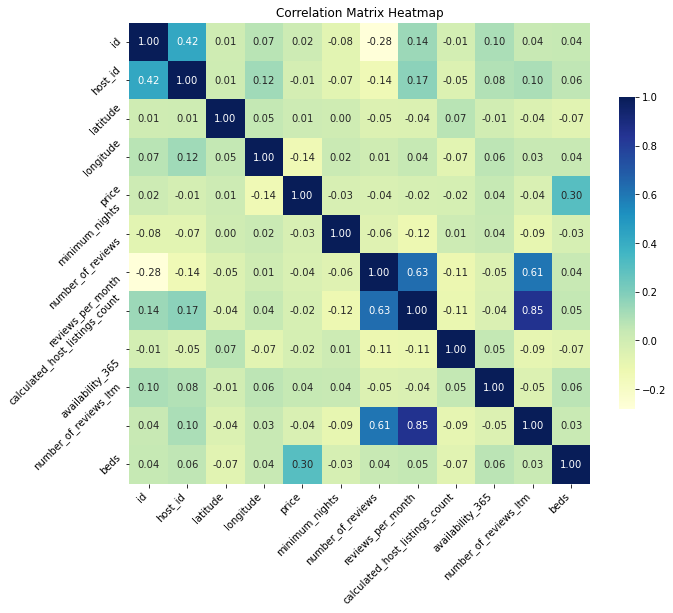

In [10]:
corr_matrix=df.corr()
print(corr_matrix)                                #print the correlation matrix for the dataframe

print("\n")

#start generating the heatmap
plt.figure(figsize=(10, 10))                      #setting the size of the heatmap to 10x10
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', square=True, cbar_kws={'shrink': .5})    #getting the correlation matrix; showing the correlation values on the heatmap; formatting the annotation to show values till 2 decimal places; setting the colour map to YlGnBu; making every cell of the heatmap to be square; decreasing the colorbar size by 50%
plt.title('Correlation Matrix Heatmap')           #setting the title
plt.xticks(rotation=45, ha="right")               #rotating the values of the x-axis to 45 degrees to make the more visible and aligning the labels to right
plt.yticks(rotation=45)                           #rotating the values of the y-axis to 45 degrees to make the more visible
plt.tight_layout()                                #adjusting the layout to increase visibility
plt.show()                                        #print the heatmap

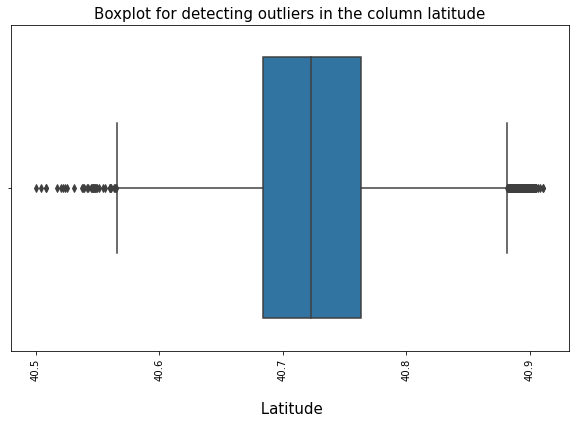

In [11]:
plt.figure(figsize=(10, 6))                                                         #setting the size of the box-plot to 10x6
sns.boxplot(x=df['latitude'])                                                       #creating a box-plot using the seaborn library
plt.xticks(rotation=90)                                                             #rotating the values of the x-axis to 90 degrees to make the more visible
plt.xticks(fontsize=10)                                                             #setting font-size of the values of the x-axis to 10
plt.xlabel('\n Latitude', fontsize=15)                                              #creating a label for the x-axis and setting its font-size to be 15
plt.title('Boxplot for detecting outliers in the column latitude', fontsize=15)     #giving a title to the box plot and setting its font-size to be 15
plt.show()                                                                          #print the box-plot

An outlier can be defined as a data point which has a value that is significantly different from the overall pattern followed by the data set.

I found outliers in almost every column of our dataset but the columns in which the outliers were the best seen were 'rating', 'latitude' and 'longitude'.

Out of these three columns as well, the columns 'latitude' and 'longitude' showed the most clearest and cleanest outliers so we used visualisation to show the outliers in the 'latitude' column.

For visualization, we can use box-plots, histograms, distplots, scatter plots and many others.

I used a box-plot to visualise the outliers for the following reasons:

*   Box plots present a clear representation of the values provided to it.
*   Box plots can easily visualise the data distribution which helps to see the outliers clearly.
*   In box plots, outliers are the data points that fall outside the whiskers of the box created making it straightforward to detect and understand the outliers.







Scatter Plot


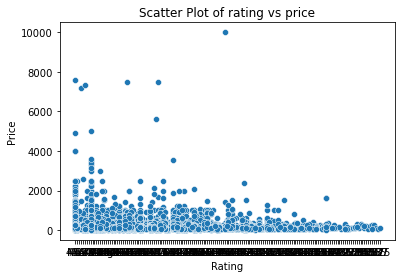



Histogram


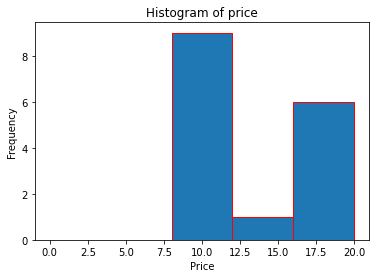



Distplot


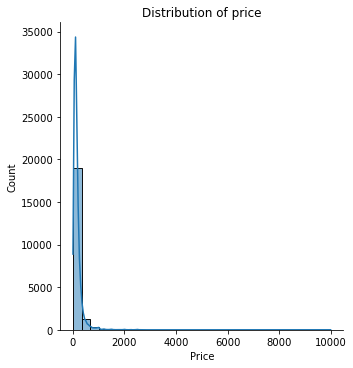



Stripplot


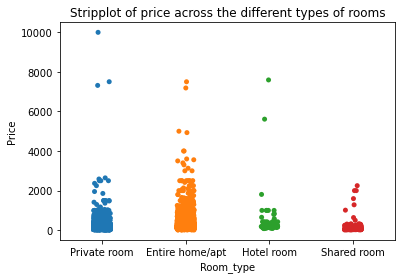



Violinplot


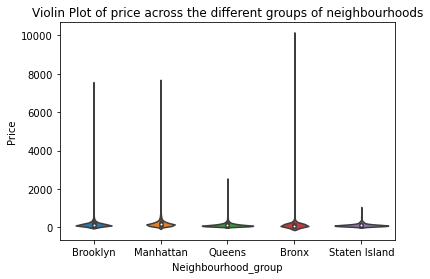

In [12]:
#rating, latitude, longitude, price and reviews_permonth are the continous variables

print("Scatter Plot")
sns.scatterplot(data=df, x='rating', y='price')                                      #creating a scatterplot using the seaborn library
plt.title('Scatter Plot of rating vs price')                                         #giving a title to the scatterplot
plt.xlabel('Rating')                                                                 #giving the label of the x-axis a name
plt.ylabel('Price')                                                                  #giving the label of the y-axis a name
plt.show()                                                                           #print the scatterplot
print("\n")

print("Histogram")
plt.hist(df['price'], bins=[0,4,8,12,16,20], edgecolor='r')                          #creating a histogram using the seaborn library
plt.title('Histogram of price')                                                      #giving a title to the histogram
plt.xlabel('Price')                                                                  #giving the label of the x-axis a name
plt.ylabel('Frequency')                                                              #giving the label of the y-axis a name
plt.show()
print("\n")                                                                          #print the histogram


print("Distplot")
sns.displot(df['price'], bins=30, kde=True)                                          #creating a distplot using the seaborn library
plt.title('Distribution of price')                                                   #giving a title to the distplot
plt.xlabel('Price')                                                                  #giving the label of the x-axis a name
plt.show()
print("\n")                                                                          #print the histogram

print("Stripplot")
sns.stripplot(data=df, x='room_type', y='price', jitter=True)                        #creating a stripplot using the seaborn library
plt.title('Stripplot of price across the different types of rooms')                  #giving a title to the stripplot
plt.xlabel('Room_type')                                                              #giving the label of the x-axis a name
plt.ylabel('Price')                                                                  #giving the label of the y-axis a name
plt.show()
print("\n")                                                                          #print the stripplot

print("Violinplot")
sns.violinplot(data=df, x='neighbourhood_group', y='price')                          #creating a violinplot using the seaborn library
plt.title('Violin Plot of price across the different groups of neighbourhoods')      #giving a title to the violinplot
plt.xlabel('Neighbourhood_group')                                                    #giving the label of the x-axis a name
plt.ylabel('Price')                                                                  #giving the label of the y-axis a name
plt.show()                                                                           #print the violinplot


**I have taken X-Axis and Y-Axis variables in such a way that the graph visualization is perfect.**

1.   Scatter Plot

We can use a scatter plot to visualise the relationship between two variables which means that it helps to identify the patterns between variables.

Scatter plots can be used for both independent and dependent variables.



2.   Histograms

A histogram is used to display the distribution of a single variable with respect to the target variable.

It is similar to a bar graph and it condenses the given data points into a visual that is easy to interpret.


3.   Distribution plot

A distribution plot is a type of plot that shows the variation in data distribution.

It displays two different plots for the same variable, and is used to visually assess the distribution by comparing the observed data and expected outcomes.

4.   Strip Plot

I used strip plots to display all the data points on an axis, individually.

It can be used instead of box plots or violin plots in cases where the data points are present with a representation of the underlying distribution.

It can be used for a single variable and also for the comparison of two variables.

5.   Violin Plot

A violin plot can visualise the distribution of a feature across all the categories of the target variable.

By doing this, we will be able to understand the distributional differences between categories.








